<a href="https://colab.research.google.com/github/Emueni22/Financial-Inclusion-IP/blob/main/Hypothesis_Testing_AutolibCars_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROBLEM STATEMENT**

To determine whether there is a difference in the number of bluecars taken from stations in Paris and the number of bluecars returned to the stations during the weekends.

**Hypothesis** 

**Null Hypothesis**: There is no difference in the sum of bluecars taken fron stations and the sum of bluecars returned during the weekend.

**Alternate Hypothesis**: There is a difference in the sum of bluecars taken fron stations and the sum of bluecars returned during the weekend.

This hypothesis is interesting as it will help us find out which of the two days of the weekends is the busiest and will enable the company determine the car provision and distribution. It will aslo monitor the cars in for accountability.

our claim test will be: Is the number of blue cars taken from stations in Paris and the number of bluecars returned to the stations equal during the weekends.


**Data Description/ Understanding of Context**

This study seeks to determine if the total number of bluecars taken/shared differs during the 2 days of the weekends.
Data used was sourced from  Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset. https://bit.ly/DSCoreAutolibDataset

Ou key variable are; dayofweek,	bluecars_taken_sum,	and bluecars_returned_sum.

**Experimental Design**

Problem Understanding

Data Understanding

Data Preparation

Modelling

Evaluation:
 1. Hypothesis testing Procedure
 2. Test Results Analysis and Discussion
 3. Summary and Conclusion







**Importing libraries to be used**

In [407]:
import pandas as pd # For data manipulation

import numpy as np # For working with arrays

import matplotlib.pyplot as plt # For visualization
%matplotlib inline

import seaborn as sns # For data visualization

import scipy.stats as stats

**Loading the data set**

In [408]:
# Reading our url

url = 'https://bit.ly/DSCoreAutolibDataset'

Autolib = pd.read_csv(url)

# Checking the top rows of our data

Autolib.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [409]:
# Checking the last rows of our data

Autolib.tail()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


In [410]:
# Checking the shape/ size of our dataset

Autolib.shape

(16085, 13)

Our dataset has **16085** rows and **13** columns

**DATA DESCRIPTION**

To understand the context of our dataset, we load the glossary to understand what each variable describes.
we use the columns explanation data set to get the definations of the variables.

In [411]:
# Checking on the information of our dataset (type of data)

Autolib.info()

# Our data set doesn't have any null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


Our dataset has **11** columns with integers (Numerical data)** 2** columns with object data type.
The date column has the wrong data type so we will have to correct that during data cleaning.

In [412]:
# Loading the glossary data set

url = 'https://bit.ly/DSCoreAutolibDatasetGlossary'

glossary = pd.read_excel(url)

glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


**Data Cleaning**

In [413]:
# Replacing whitespaces in the columns with underscores and converting column names to lowercase to ensure uniformity in our data ser

Autolib.columns = Autolib.columns.str.replace(' ', '_').str.lower()

# confirming 
Autolib.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [414]:

Autolib.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [415]:
# Checking for duplicates. The Postal code column should only contain unique values so we countercheck.

Autolib.duplicated().sum()

# This dataset has no duplicate values

0

In [416]:
# As seen earlier, our data set has a colum with wrong data typr.
# Correcting the date column data type

# converting date column to datetime
Autolib.date = pd.to_datetime(Autolib.date)

# Confirming the change
Autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   postal_code             16085 non-null  int64         
 1   date                    16085 non-null  datetime64[ns]
 2   n_daily_data_points     16085 non-null  int64         
 3   dayofweek               16085 non-null  int64         
 4   day_type                16085 non-null  object        
 5   bluecars_taken_sum      16085 non-null  int64         
 6   bluecars_returned_sum   16085 non-null  int64         
 7   utilib_taken_sum        16085 non-null  int64         
 8   utilib_returned_sum     16085 non-null  int64         
 9   utilib_14_taken_sum     16085 non-null  int64         
 10  utilib_14_returned_sum  16085 non-null  int64         
 11  slots_freed_sum         16085 non-null  int64         
 12  slots_taken_sum         16085 non-null  int64 

In [417]:
# selecting columns where day_type = weekend because we will be working with weekends only

Autolib1 = Autolib[Autolib['day_type'] == 'weekend']
Autolib1 
Autolib1.sample(8)
# Will work with weekend since the selection requires choise of one data set fro the day type column.

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
1912,75013,2018-02-10,1440,5,weekend,682,659,20,19,46,45,196,194
12660,93700,2018-01-06,1437,5,weekend,35,44,1,4,5,5,0,1
12464,93500,2018-05-05,1440,5,weekend,58,67,2,2,1,2,0,0
1518,75010,2018-04-28,1440,5,weekend,321,352,6,9,30,32,89,99
6368,92220,2018-05-26,1440,5,weekend,68,69,0,0,6,4,0,0
5998,92200,2018-03-18,1440,6,weekend,37,31,2,1,4,4,0,0
7349,92300,2018-01-21,1440,6,weekend,189,207,4,5,5,4,0,0
13922,94150,2018-01-21,1440,6,weekend,15,13,1,1,1,0,1,0


In [418]:
# Checking for the number of days in a weekend and counting the unique values occurence.

Autolib1.dayofweek.unique()

Autolib1['dayofweek'].value_counts()

6    2274
5    2267
Name: dayofweek, dtype: int64

The weekend date type has two days : Saturday (5) and Sunday(6). With Saturday having **2274** entries and Sunday **2267**.
This creates the bases for our hypothisis formulation.

In [419]:
# Droping the day type column as it will remain the same across the data set.

Autolib1.drop('day_type', inplace = True, axis = 1)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [420]:
Autolib1.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

**Outliers**

In [421]:
Autolib1.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,88794.686633,1434.694781,5.500771,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,20.819324,0.500054,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,1318.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1440.000000,5.000000,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,6.000000,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,1440.000000,6.000000,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


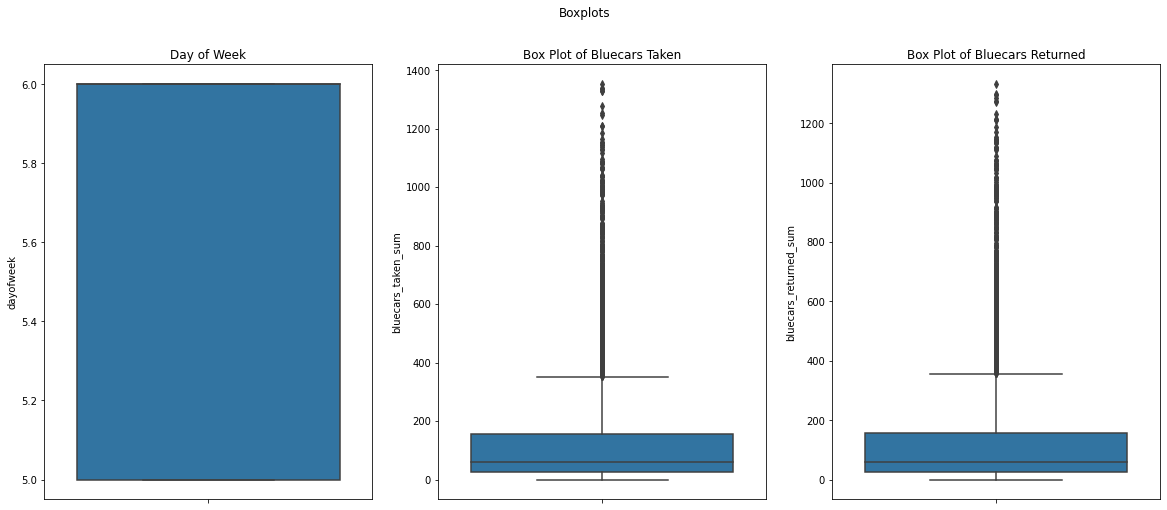

In [422]:
# Checking for Outliers

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=Autolib1, y = "dayofweek", ax=ax[0])
ax[0].set_title('Day of Week')
sns.boxplot(data=Autolib1, y = "bluecars_taken_sum", ax=ax[1])
ax[1].set_title('Box Plot of Bluecars Taken')
sns.boxplot(data=Autolib1, y = "bluecars_returned_sum", ax=ax[2])
ax[2].set_title('Box Plot of Bluecars Returned')

plt.show()

# Day of week has no Outlier

In [423]:
# We can identify the exact outliers in the cars taken attributes with the function below

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(Autolib1['bluecars_taken_sum'])


[816,
 826,
 1061,
 913,
 1255,
 1097,
 1352,
 1132,
 1248,
 1014,
 1327,
 1043,
 1118,
 1036,
 1144,
 1037,
 1136,
 999,
 1127,
 1038,
 1209,
 980,
 1186,
 981,
 1024,
 939,
 1277,
 1082,
 1144,
 1002,
 1023,
 925,
 984,
 899,
 1155,
 1016,
 1335,
 1152,
 1338,
 1164,
 1330,
 1087,
 1209,
 1001,
 847,
 842,
 985,
 918,
 1062,
 989,
 1069,
 847,
 1065,
 905,
 982,
 839,
 953,
 867,
 875,
 1003,
 853,
 1015,
 827,
 987,
 852,
 1020,
 894,
 931,
 919,
 840,
 1088,
 842,
 978,
 978,
 1080,
 989,
 1006,
 901,
 988,
 845,
 928,
 992,
 890,
 945,
 920,
 929,
 877,
 981,
 846,
 873,
 862,
 872,
 991,
 938,
 985,
 977,
 936,
 932,
 816,
 834,
 868,
 973,
 817,
 974,
 857,
 923,
 829,
 859]

In [424]:
# We can identify the exact outliers in the cars returned attributes with the function below

outliers = []

def detect_outlier(data):
  threshold=3
  mean_1=np.mean(data)
  std_1=np.std(data)

  for y in data:
    z_score=(y-mean_1)/std_1
    if np.abs(z_score)>threshold:
      outliers.append(y)
  return outliers
detect_outlier(Autolib1['bluecars_returned_sum'])

[824,
 1015,
 971,
 1211,
 1135,
 1300,
 1149,
 1214,
 1049,
 1287,
 1118,
 1136,
 1066,
 1117,
 1072,
 1118,
 1057,
 1111,
 1119,
 1210,
 1046,
 1142,
 1033,
 967,
 979,
 1171,
 1189,
 1133,
 1051,
 1017,
 979,
 947,
 910,
 1146,
 1045,
 1276,
 1271,
 1294,
 1230,
 1332,
 1143,
 1154,
 1090,
 868,
 851,
 973,
 940,
 1077,
 1003,
 1061,
 890,
 1044,
 970,
 989,
 846,
 954,
 890,
 892,
 990,
 860,
 984,
 847,
 1020,
 861,
 1010,
 860,
 915,
 898,
 816,
 816,
 1064,
 881,
 966,
 987,
 1076,
 979,
 996,
 879,
 990,
 873,
 904,
 846,
 987,
 963,
 939,
 981,
 938,
 958,
 963,
 917,
 867,
 852,
 887,
 845,
 864,
 969,
 852,
 901,
 979,
 831,
 834,
 983,
 975,
 949,
 898,
 845,
 876,
 963,
 894,
 965,
 897,
 949,
 883,
 891,
 834,
 816]

We can see that all this are possible values for numbers of cars taken or returned.
Autolib had about 4000 registered electric cars in 2018.





**UNIVARIATE ANALYSIS**

**Measures of Central Tendency**

In [425]:
# descriptive statistics of the columns in the dataframe

Autolib1.describe()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000,4541.000000
mean,88794.686633,1434.694781,5.500771,151.090068,152.029289,4.393085,4.414666,10.129707,10.184761,26.909712,26.970932
std,7646.521844,20.819324,0.500054,218.565642,221.140337,6.747905,6.834645,14.821601,14.973810,61.357605,61.531368
min,75001.000000,1318.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1440.000000,5.000000,25.000000,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,6.000000,59.000000,58.000000,2.000000,2.000000,4.000000,4.000000,0.000000,0.000000
75%,93400.000000,1440.000000,6.000000,156.000000,157.000000,5.000000,5.000000,11.000000,12.000000,6.000000,6.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of blue cars taken')

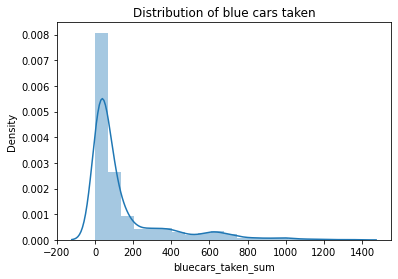

In [426]:
# Plot bluecars taken

sns.distplot(Autolib1['bluecars_taken_sum'], bins=20)
plt.title('Distribution of blue cars taken')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Distribution of blue cars Returned')

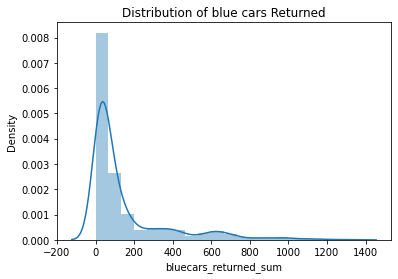

In [427]:
#Plot bluecars bluecars returned

sns.distplot(Autolib1['bluecars_returned_sum'], bins=20)
plt.title('Distribution of blue cars Returned')

In [428]:
# Mean, mode, Standard deviation and Variance of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum & slots_taken_sum 

Numcol = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']

for column in Numcol:
  print('mean of {}: {:.2f}' .format(column, Autolib1[column].mean()))

# Mode
print('\n')

Numcol = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum', 'dayofweek']

for column in Numcol:
  print('mode of %s: %d' % (column, Autolib1[column].mode()))  

#Standard Deviation
print('\n')

Numcol = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']
for column in Numcol:
  print('Standard deviation of {}: {:.2f}' .format(column, Autolib1[column].std())) 

#Standard Deviation
print('\n')

Numcol = ['bluecars_returned_sum', 'bluecars_taken_sum', 'slots_freed_sum', 'slots_taken_sum']
for column in Numcol:
  print('Variance of {}: {:.2f}' .format(column, Autolib1[column].var()))   

mean of bluecars_returned_sum: 152.03
mean of bluecars_taken_sum: 151.09
mean of slots_freed_sum: 26.91
mean of slots_taken_sum: 26.97


mode of bluecars_returned_sum: 17
mode of bluecars_taken_sum: 14
mode of slots_freed_sum: 0
mode of slots_taken_sum: 0
mode of dayofweek: 6


Standard deviation of bluecars_returned_sum: 221.14
Standard deviation of bluecars_taken_sum: 218.57
Standard deviation of slots_freed_sum: 61.36
Standard deviation of slots_taken_sum: 61.53


Variance of bluecars_returned_sum: 48903.05
Variance of bluecars_taken_sum: 47770.94
Variance of slots_freed_sum: 3764.76
Variance of slots_taken_sum: 3786.11


Day 6(Sunday) features the most in the dataset.

In most cases the number of cars taken is lower than the  number of cars returned.

Standard devaition in the distribution of slots freed vs slots taken is almost equal.

there is a significantly high variance in the distribution of bluec


**Skewness and Kurtosis**

In [429]:
# Finding skewness and kurtosis of bluecars_returned_sum, bluecars_taken_sum, slots_freed_sum & slots_taken_sum 

for column in Numcol:
  print('Kurtosis of {}: {:.2f}' .format(column, Autolib1[column].kurt()))

print('\n')

for column in Numcol:
  print('Skewness of {}: {:.2f}' .format(column, Autolib1[column].skew()))  

Kurtosis of bluecars_returned_sum: 5.13
Kurtosis of bluecars_taken_sum: 5.30
Kurtosis of slots_freed_sum: 5.55
Kurtosis of slots_taken_sum: 5.50


Skewness of bluecars_returned_sum: 2.28
Skewness of bluecars_taken_sum: 2.30
Skewness of slots_freed_sum: 2.48
Skewness of slots_taken_sum: 2.48


All four variables have a kurtosis value greater than 3, which indicates that the distributions for all four variables are more peaked than a normal distribution.This could be a indication of outliers.

The bluecars_returned_sum and bluecars_taken_sum have a skewness of **2.28 and 2.30** respectively. This means that the data is skewed to the right. The slots_freed_sum and slots_taken_sum have a skewness of **2.48.** This means that the data is skewed to the left.

In [430]:
# checking for the total sum of bluecars taken on the specific days of the weekend.

Autolib1.groupby('dayofweek')[['bluecars_taken_sum']].sum().sort_values('bluecars_taken_sum', ascending=False)



,bluecars_taken_sum
dayofweek,
5,353934
6,332166


Day 5(Saturday) has high number of bluecars being taken (**353934**) compared to day 6(Sunday).

In [431]:
# Using frequency table to check the total sum of bluecars taken on the specific days of the weekend.

Autolib1.groupby('dayofweek')[['bluecars_returned_sum']].sum().sort_values('bluecars_returned_sum', ascending=False)

,bluecars_returned_sum
dayofweek,
5,351570
6,338795


Though the number of cars being returned in day 5 is still higher than in day 6.

In comparison to the number taken, day 6 seem to have more cars being returned.
This could be an indicator that some of the cars taken on day 5 are usually not being returned till the following day.

In [432]:
# ckecking for unique values in the postal_code column to see how manty times individuals from the same postal code used the services

#print(Autolib.postal_code.unique())

Autolib1['postal_code'].value_counts()

# There are 104 distinct postal codes in the postal_code column

75001    44
92310    44
93370    44
93360    44
93350    44
         ..
93440    43
92360    42
92340    42
93200    36
93390    25
Name: postal_code, Length: 104, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



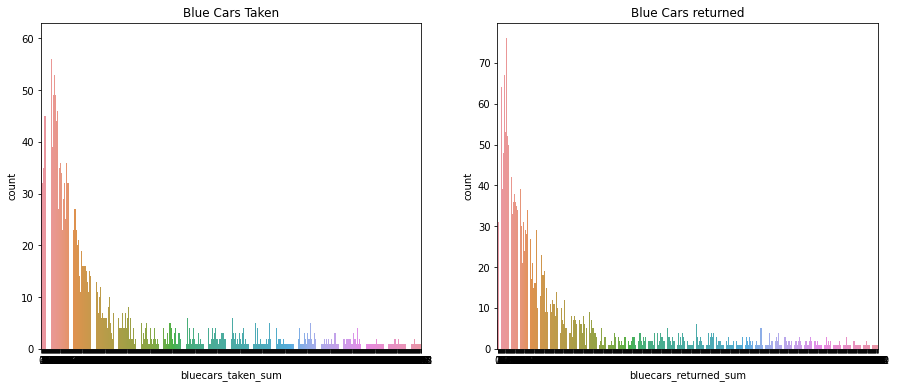

In [433]:
# barplot showing the number of blue cars taken/ returned on the weekend

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot('bluecars_taken_sum',data=Autolib1,ax=ax[0])
ax[0].set_title('Blue Cars Taken')
sns.countplot('bluecars_returned_sum',data=Autolib1,ax=ax[1])
ax[1].set_title('Blue Cars returned')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'WEEKEND')

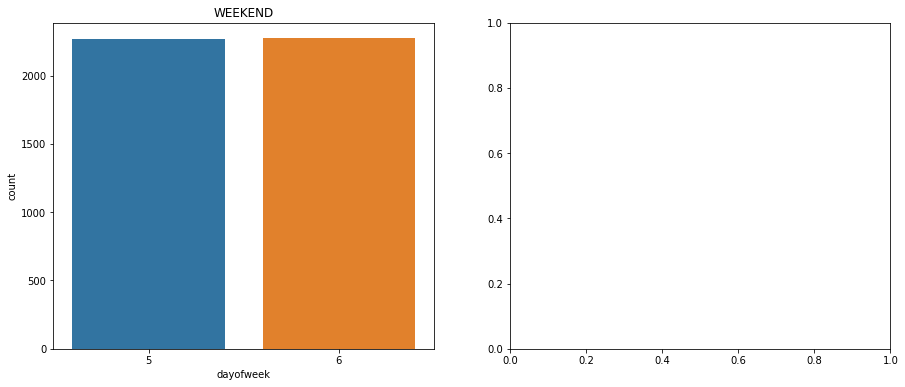

In [434]:
# Plotting abar chart to visualize all the entries for both the days of the wekend

fig,ax=plt.subplots(1,2,figsize=(15,6))
sns.countplot('dayofweek',data=Autolib1,ax=ax[0])
ax[0].set_title('WEEKEND')

Text(0, 0.5, '')

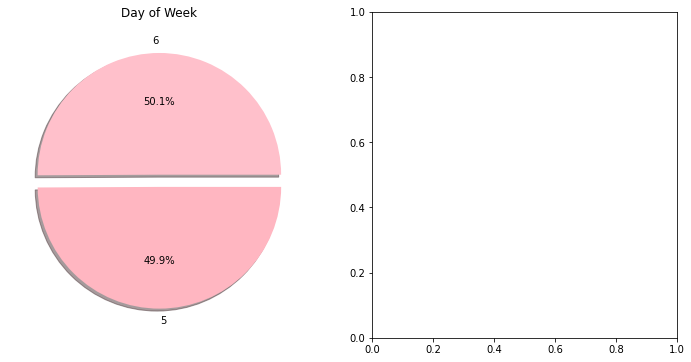

In [435]:
# Pie chart showing percentage distribution of cars taken on either day of the weekend,

fig,ax=plt.subplots(1,2,figsize=(12,6))
colors = ['pink', 'lightpink']
Autolib1['dayofweek'].value_counts().plot.pie(explode=[0,0.1],colors=colors, autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Day of Week')
ax[0].set_ylabel('')

The percentage distribution of cars being taken or returned is higher in Sundays(6) compared to Saturdays(5).

**BIVARIATE ANALYSIS**

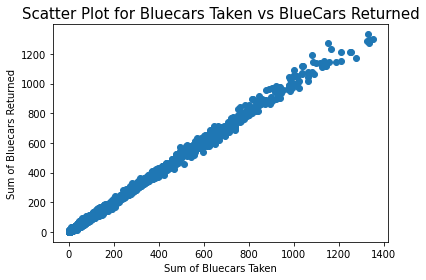

In [436]:
# Scatter Plot for Bluecars Taken vs BlueCars Returned

plt.figure(figsize=(6,4))
plt.scatter(Autolib1.bluecars_taken_sum, Autolib1.bluecars_returned_sum)
plt.xlabel('Sum of Bluecars Taken')
plt.ylabel('Sum of Bluecars Returned')
plt.title('Scatter Plot for Bluecars Taken vs BlueCars Returned', fontsize=15)
plt.show()

There is a strong positive correlation between the number of blue cars taken 
and number of blue cars returned,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



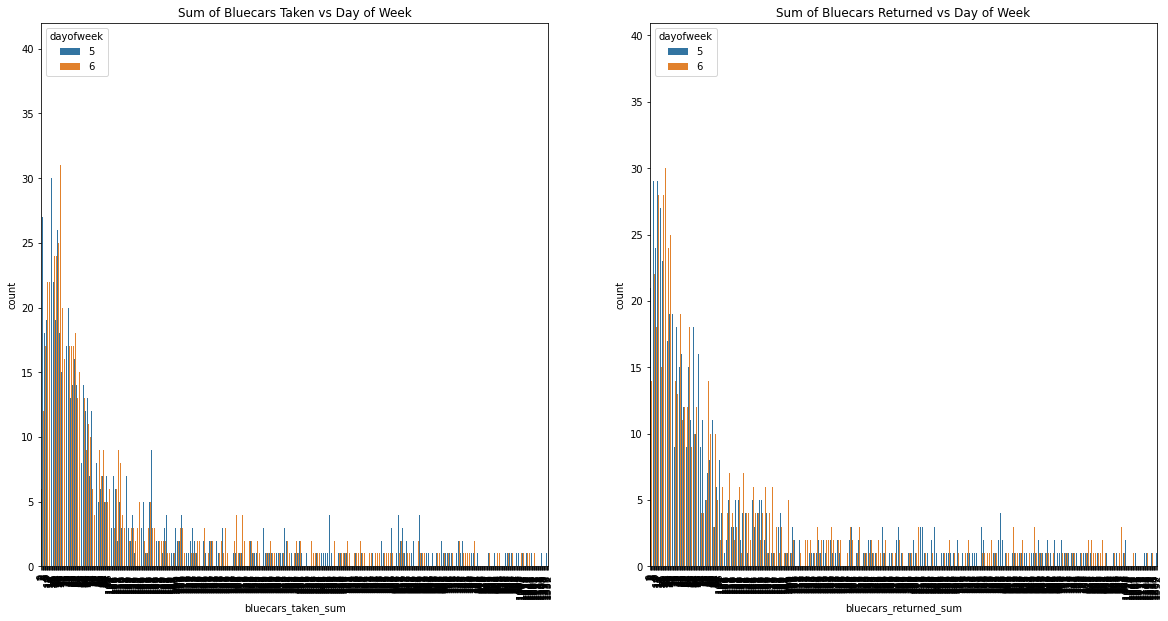

In [437]:
#Plotting the sum number of bluecars taken/returned o either day of the weekend.


fig,ax=plt.subplots(1,2,figsize=(20,10))

sns.countplot('bluecars_taken_sum',hue='dayofweek',data=Autolib1,ax=ax[0])
ax[0].set_title('Sum of Bluecars Taken vs Day of Week')


sns.countplot('bluecars_returned_sum',hue='dayofweek',data=Autolib1,ax=ax[1])
ax[1].set_title('Sum of Bluecars Returned vs Day of Week')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

**MULTIVARIATE ANALYSIS**

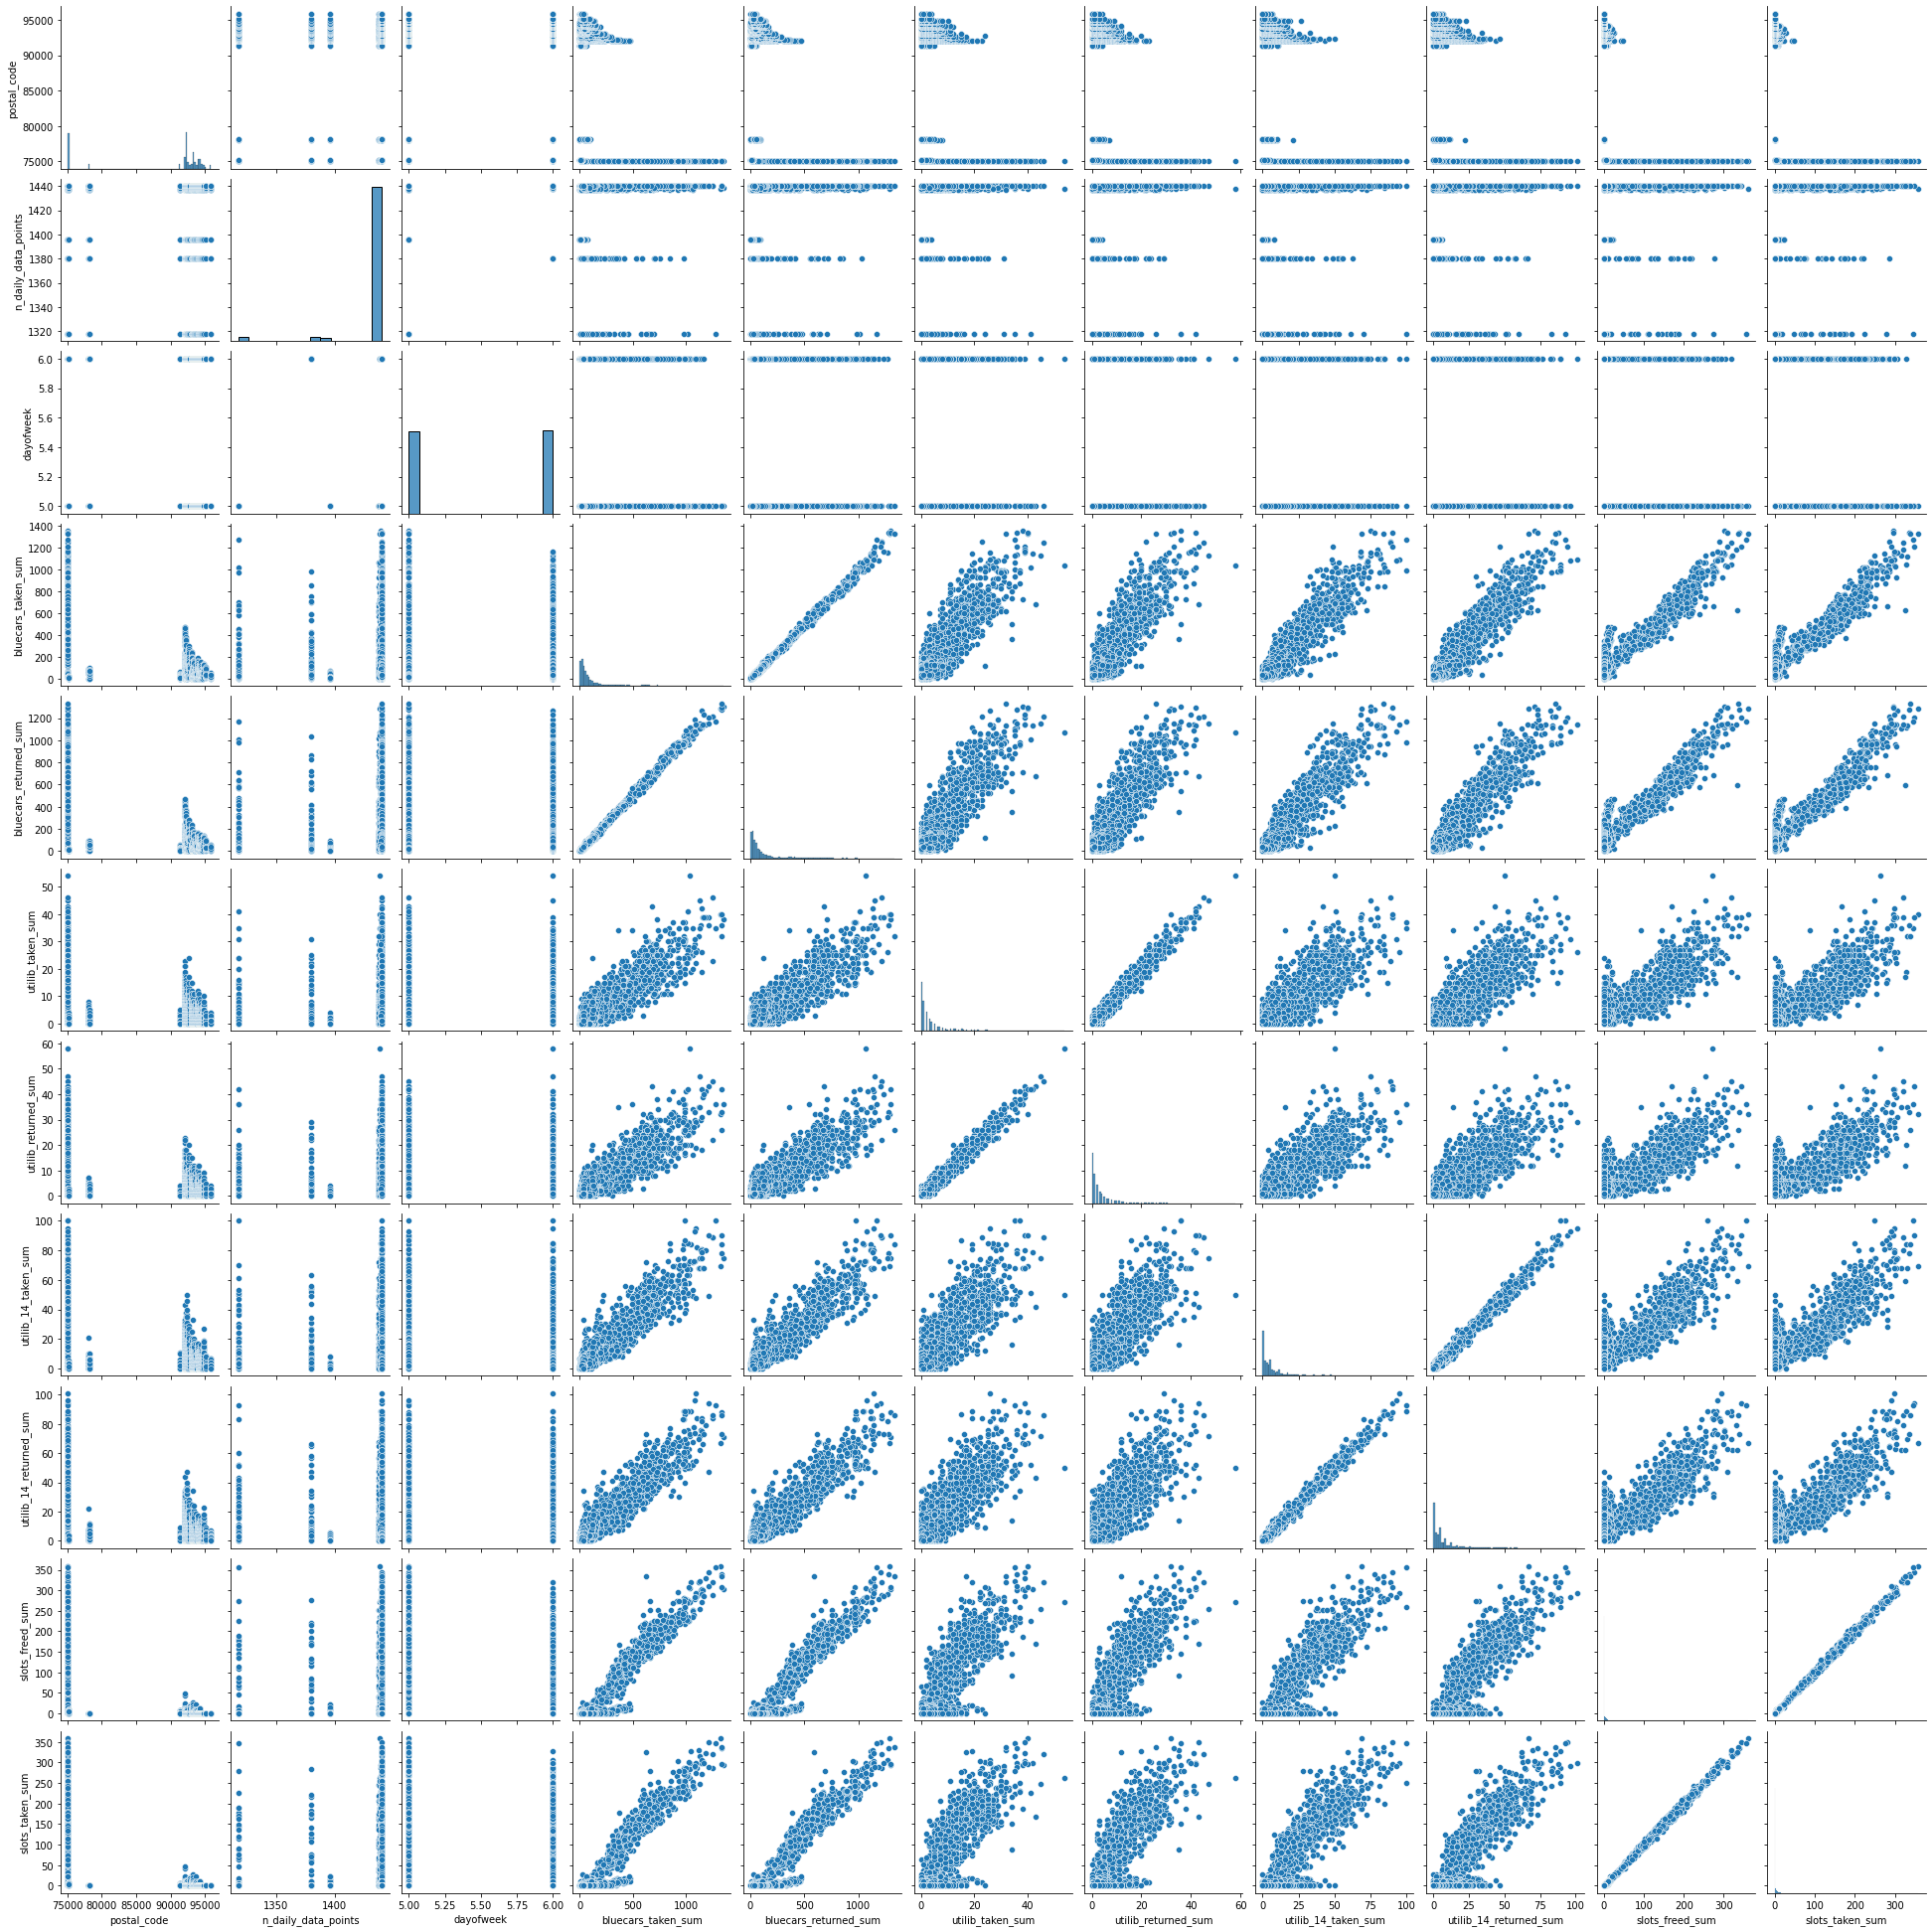

In [438]:
# Using paairplot of scatter plot and histogram of the columns in the dataset to show case distribuiton.

sns.pairplot(Autolib1)
plt.show()

In [439]:
# Checking the correlation of all the numerical variables

Autolib1.corr()

,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
postal_code,1.000000,0.001558,0.000809,-0.713358,-0.714426,-0.634451,-0.634210,-0.662694,-0.664766,-0.757568,-0.757646
n_daily_data_points,0.001558,1.000000,0.115753,0.023170,0.024409,0.017086,0.020379,0.012423,0.014031,0.012419,0.011790
dayofweek,0.000809,0.115753,1.000000,-0.023001,-0.013783,-0.017486,-0.010115,-0.020267,-0.014536,-0.015030,-0.015791
bluecars_taken_sum,-0.713358,0.023170,-0.023001,1.000000,0.998578,0.907490,0.905035,0.944081,0.944889,0.953812,0.953540
bluecars_returned_sum,-0.714426,0.024409,-0.013783,0.998578,1.000000,0.906607,0.905320,0.943025,0.945138,0.953249,0.954030
utilib_taken_sum,-0.634451,0.017086,-0.017486,0.907490,0.906607,1.000000,0.985807,0.863832,0.861586,0.866125,0.865455
utilib_returned_sum,-0.634210,0.020379,-0.010115,0.905035,0.905320,0.985807,1.000000,0.859434,0.858373,0.863675,0.863808
utilib_14_taken_sum,-0.662694,0.012423,-0.020267,0.944081,0.943025,0.863832,0.859434,1.000000,0.993834,0.904365,0.903680
utilib_14_returned_sum,-0.664766,0.014031,-0.014536,0.944889,0.945138,0.861586,0.858373,0.993834,1.000000,0.905867,0.906058
slots_freed_sum,-0.757568,0.012419,-0.015030,0.953812,0.953249,0.866125,0.863675,0.904365,0.905867,1.000000,0.999324


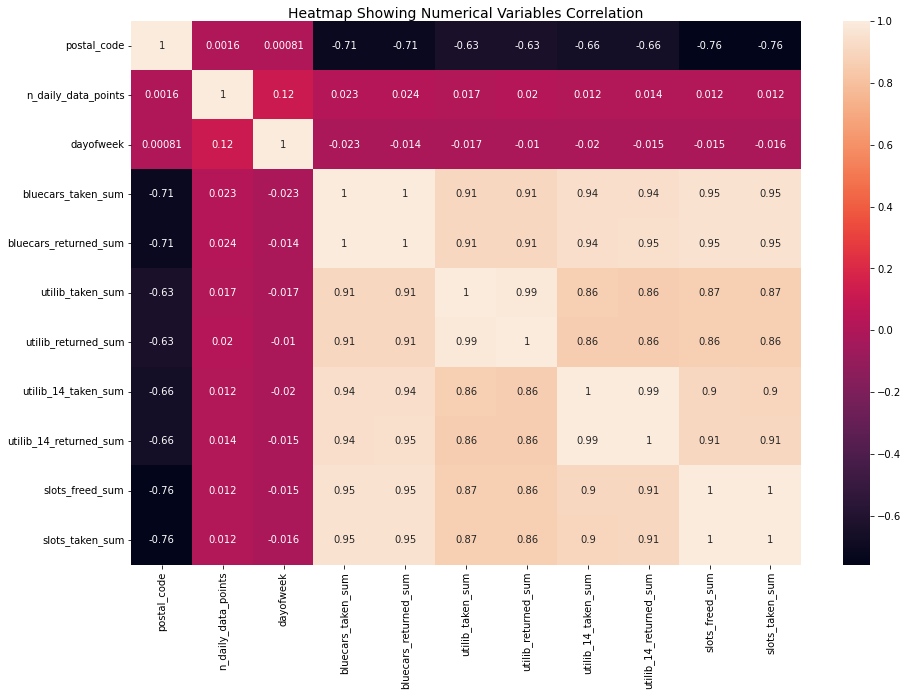

In [440]:
heatmap = Autolib1.corr()
plt.figure(figsize=(15,10))
sns.heatmap(heatmap, xticklabels=heatmap.columns, yticklabels=heatmap.columns, annot=True)
plt.title('Heatmap Showing Numerical Variables Correlation', fontsize=14, pad=2)
plt.show()

There is a strong positive correlation **1** between the sum of number of bluecars taken and the sum number of bluecars returned.

Sum number of bluecars(taken/returned), sum of utilib(taken/returned),sum of utilib 14 (taken/returned), sum of slots freed and sum of slots taken all seem to  be srongly correlated, with the least having a correlation of **0.86**. Which is the correlation beween the sum of utilib 14 (taken/returned) and sum of utilib returned.

**Hypothesis Testing**

**Null Hypothesis**: There is no difference in the sum of bluecars taken fron stations and the sum of bluecars returned during the weekend.

**Alternate Hypothesis**: There is a difference in the sum of bluecars taken fron stations and the sum of bluecars returned during the weekend.

In [441]:
# Dropping unnecesassary columns

Autolib1.drop(['date', 'n_daily_data_points', 'utilib_taken_sum', 'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum', 'slots_freed_sum', 'slots_taken_sum'], axis=1, inplace=True)
Autolib1

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
5,75001,5,187,185
6,75001,6,180,180
12,75001,5,224,223
13,75001,6,193,193
19,75001,5,217,217
...,...,...,...,...
16068,95880,6,36,33
16074,95880,5,15,15
16075,95880,6,34,32
16081,95880,5,19,19


In [442]:
Autolib1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4541 entries, 5 to 16082
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   postal_code            4541 non-null   int64
 1   dayofweek              4541 non-null   int64
 2   bluecars_taken_sum     4541 non-null   int64
 3   bluecars_returned_sum  4541 non-null   int64
dtypes: int64(4)
memory usage: 306.4 KB


In [443]:
Autolib1.count()

postal_code              4541
dayofweek                4541
bluecars_taken_sum       4541
bluecars_returned_sum    4541
dtype: int64

In [444]:
## NORMALITY TESTS
from scipy.stats import shapiro

def shapiro_test(Autolib1, col_list):
    for x in col_list:
        print(x)
        data = Autolib1[x]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret

        alpha = 0.05
        if p > alpha:
            print('Sample looks Normally Distributed (fail to reject H0)')
        else:
            print('Sample does not look Normally Distributed (reject H0)')

        print('\n')

# shapiro Wilk's test

shapiro_test(Autolib1, list(Autolib1.columns))        

postal_code
Statistics=0.642, p=0.000
Sample does not look Normally Distributed (reject H0)


dayofweek
Statistics=0.637, p=0.000
Sample does not look Normally Distributed (reject H0)


bluecars_taken_sum
Statistics=0.667, p=0.000
Sample does not look Normally Distributed (reject H0)


bluecars_returned_sum
Statistics=0.666, p=0.000
Sample does not look Normally Distributed (reject H0)




**Random Sampling**

In [445]:
# Using simple random sampling to create a sample. The size of the sample is 30% of the data

Autosamp = Autolib1.sample(n = 2000, replace = "False")
Autosamp.head()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
949,75007,6,304,315
5775,92190,6,92,83
5218,92140,6,91,93
3022,75020,5,631,596
12620,93600,5,16,17


In [446]:
Autosamp.shape

(2000, 4)

**Cluster Sampling**

In [447]:
# Loading libraries

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation #For clustering
from sklearn.mixture import GaussianMixture #For GMM clustering
import os                    
import sys  

<function matplotlib.pyplot.show(*args, **kw)>

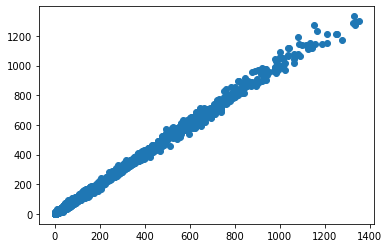

In [448]:
# cluster sampling

plt.scatter(Autolib1['bluecars_taken_sum'],Autolib1['bluecars_returned_sum'])
plt.show

In [449]:
x = Autolib1.iloc[:, 2:4]
x

,bluecars_taken_sum,bluecars_returned_sum
5,187,185
6,180,180
12,224,223
13,193,193
19,217,217
...,...,...
16068,36,33
16074,15,15
16075,34,32
16081,19,19


In [450]:
kmeans = KMeans(2)
kmeans.fit(x)


KMeans(n_clusters=2)

In [451]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [452]:
kmeans.cluster_centers_

array([[ 70.26713396,  70.13707165],
       [602.94775036, 609.86502177]])

In [453]:
kmeans.inertia_

102803584.02417478

In [454]:
# Creating a copy of our data set

Autolib2 = Autolib1.copy()

# Creating a series with identified clusters
Autolib2['Cluster'] = identified_clusters
# Check the result
Autolib2

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum,Cluster
5,75001,5,187,185,0
6,75001,6,180,180,0
12,75001,5,224,223,0
13,75001,6,193,193,0
19,75001,5,217,217,0
...,...,...,...,...,...
16068,95880,6,36,33,0
16074,95880,5,15,15,0
16075,95880,6,34,32,0
16081,95880,5,19,19,0


In [455]:
#Scaling of data
ss = StandardScaler()
ss.fit_transform(Autolib2)

array([[-1.80411512, -1.0015427 ,  0.16431625,  0.14911048, -0.42256616],
       [-1.80411512,  0.99845968,  0.13228573,  0.12649792, -0.42256616],
       [-1.80411512, -1.0015427 ,  0.33362042,  0.32096599, -0.42256616],
       ...,
       [ 0.92670809,  0.99845968, -0.53577938, -0.54283406, -0.42256616],
       [ 0.92670809, -1.0015427 , -0.6044162 , -0.60162673, -0.42256616],
       [ 0.92670809,  0.99845968, -0.54035516, -0.52926652, -0.42256616]])

In [456]:
def doGMM(X, nclust=2):
    model = GaussianMixture(n_components=nclust,init_params='kmeans')
    model.fit(X)
    clust = model.predict(X)
    return (clust)

clust = doGMM(Autolib2,2)
gmm = pd.DataFrame(clust)
Autolib2.insert((Autolib2.shape[1]),'gmm',gmm)

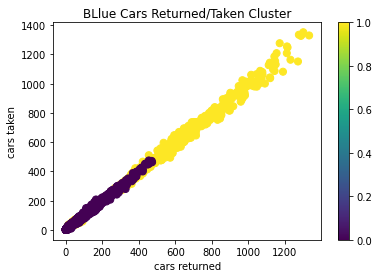

In [457]:
#Plotting the cluster obtained using GMM
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(Autolib2['bluecars_returned_sum'],Autolib2['bluecars_taken_sum'],
                     c=gmm[0],s=50)
ax.set_title('BLlue Cars Returned/Taken Cluster')
ax.set_xlabel('cars returned')
ax.set_ylabel('cars taken')
plt.colorbar(scatter)

**Stratefied Sampling**

In [458]:
# Stratified sample

Autolib3 = Autolib1.groupby('dayofweek', group_keys=False).apply(lambda grouped_subset : grouped_subset.sample(frac=0.1))
Autolib3

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
1097,75008,5,442,456
214,75002,5,264,265
9362,92500,5,188,175
1462,75010,5,438,466
4940,92120,5,86,90
...,...,...,...,...
3429,75116,6,11,9
13556,94120,6,56,55
318,75003,6,283,293
2998,75020,6,615,653


In [459]:
Autolib3.describe()

,postal_code,dayofweek,bluecars_taken_sum,bluecars_returned_sum
count,454.000000,454.000000,454.000000,454.000000
mean,88011.295154,5.500000,168.059471,169.244493
std,8099.608116,0.500552,229.039117,232.695283
min,75001.000000,5.000000,0.000000,0.000000
25%,75116.000000,5.000000,25.250000,24.250000
50%,92320.000000,5.500000,58.500000,58.000000
75%,93360.000000,6.000000,221.250000,226.250000
max,95880.000000,6.000000,1152.000000,1271.000000


In [460]:
# Cars taken pop mean

PopA = Autolib1['bluecars_taken_sum'].mean()
PopA 

151.09006826690157

In [461]:
# Cars taken sample mean

SampA = Autolib3['bluecars_taken_sum'].mean()
SampA 

168.05947136563876

In [462]:
# Cars returned sample mean

SampB = Autolib3['bluecars_returned_sum'].mean()
SampB 

169.2444933920705

In [463]:
# Cars Returned pop mean

PopB = Autolib1['bluecars_returned_sum'].mean()
PopB 

152.02928870292888

In [464]:
# sample standard deviation
std = Autolib3['bluecars_taken_sum'].std()
std


229.03911671404603

In [465]:
std1 = Autolib3['bluecars_returned_sum'].std()
std1

232.69528275495713

In [466]:
# calculating the z-score
zscore = (SampA - PopA) / std
zscore

0.07408954130714443

In [467]:
#calculating the p value

from scipy.stats import norm
p = stats.norm.cdf(zscore)
p

0.5295304313915442

In [468]:
#interpretation of the p value
if p < 0.05:   
   print(" we are rejecting null hypothesis")
else:
  print("we fail to reject null hypothesis")

we fail to reject null hypothesis


In [469]:
# point estimation. PE(population.mean() - sample.mean())
# PE for bluecars taken

PE = PopA - SampA
PE



-16.96940309873719

In [470]:
# Calculating a 95% confidence for our mean point estimate:
import math
sample_mean = Autolib3['bluecars_taken_sum'].mean()

z_critical = stats.norm.ppf(q = 0.975)  

print("z-critical value:")            
print(z_critical)                        

pop_stdev = Autolib1['bluecars_taken_sum'].std()  

margin_of_error = z_critical * (pop_stdev/math.sqrt(454))

confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)  

print("Confidence interval:")
print(confidence_interval)

z-critical value:
1.959963984540054
Confidence interval:
(147.95456491277622, 188.1643778185013)


**CONCLUSION**

We reject the null hypothesis becase there is some evidence to prove that the sum mean of the bluecars taken and that of blue cars returned is not the same.